##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Aim: Support Vector Machines (SVM)
 Implement the SVM algorithm for binary classification.
 Train an SVM model using a given dataset and optimize its parameters.
 Evaluate the performance of the SVM model on test data and analyze the
results.**

### **Bhumika Shelar | T114**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sneakers_streetwear_sales_data.csv')
df.shape

(353, 11)

In [ ]:
df.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


In [ ]:
# Drop rows with missing values
df = df.dropna()

# Drop irrelevant columns
df = df.drop(['Date'], axis=1)

In [ ]:
# Encode 'Product Type'
df['Product Type'] = df['Product Type'].astype('category').cat.codes

# Define features and dummy target
X = df[['Quantity', 'Product Type']]
y = df['Unit Price ($)'] > 200

# Convert target to int (0 = not expensive, 1 = expensive)
y = y.astype(int)

# View processed data
print(X.head())
print(y.head())

   Quantity  Product Type
0         5             4
1         2             3
2         1             3
3         4             1
4         2             3
0    0
1    1
2    1
3    1
4    0
Name: Unit Price ($), dtype: int64


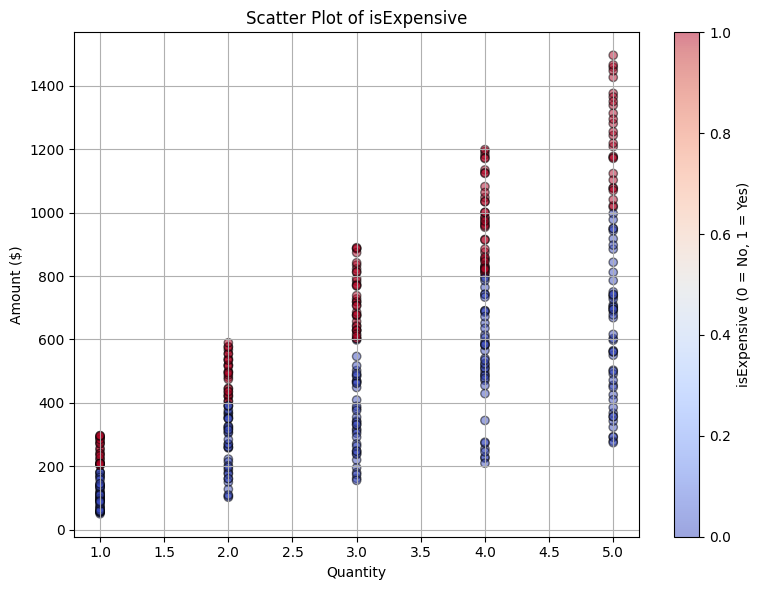

In [ ]:
# Create a simulated binary label: expensive = 1 if Unit Price > 200
df['isExpensive'] = (df['Unit Price ($)'] > 200).astype(int)

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df['Quantity'],
    df['Amount ($)'],
    c=df['isExpensive'],
    cmap='coolwarm',
    edgecolors='k',
    alpha=0.5
)

# Add labels and title
plt.xlabel("Quantity")
plt.ylabel("Amount ($)")
plt.title("Scatter Plot of isExpensive")
plt.colorbar(scatter, label="isExpensive (0 = No, 1 = Yes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and Train the SVM Classifier
model = SVC(kernel='linear', C=1, class_weight='balanced')  # balanced handles class imbalance
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [ ]:
# Accuracy
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, y_pred))

Train Accuracy: 0.5303643724696356
Test Accuracy : 0.5188679245283019


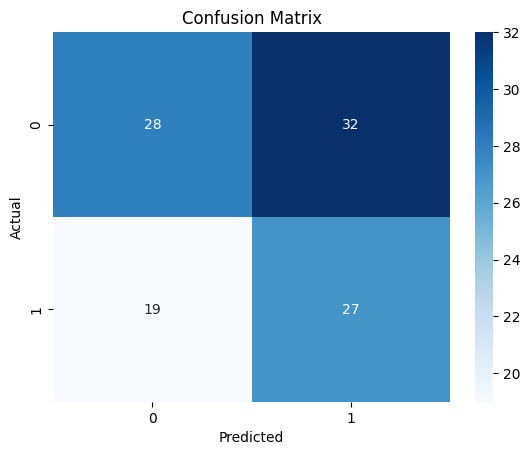

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()